# Solving ODE (Ordinary Differential equation)

As an example let us solve rate equations: decaly equation

$\frac{dN}{dt}=-\lambda N$  whose solution $N=N_0e^{-\lambda t}$


## Euler Method: ignoring higher order terms $(dt)^2$ and above

$N(t+dt)= N(t) + f(N,t)dt$

In [9]:
# \lambda = 0.2 the initail condition N_0 = 1500 
# dN/dt=-0.2N

import numpy as np
import matplotlib.pyplot as plt

In [95]:
#define the function

def f(number_of_atoms):
    return  -0.2*number_of_atoms

# step size h=dt, h=(b-a)/steps

a = 0  # initial time
b = 15 # final time
number_of_atoms = 1500 # initial condition
steps = 8 # number of time steps

h = (b-a)/steps #step size

time_space = np.arange(a,b,h)
number_of_atoms_list = []

for t in time_space:
    
    number_of_atoms_list.append(number_of_atoms)
    number_of_atoms += h*f(number_of_atoms)


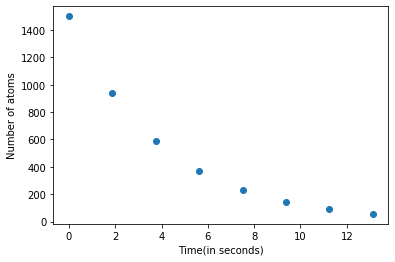

In [96]:
plt.scatter(time_space, number_of_atoms_list)
plt.xlabel("Time(in seconds)")
plt.ylabel("Number of atoms")
plt.show()

# Analytic Solution

In [97]:
def analytic_solution(time):
    return 1500*np.exp(-0.2*time)

In [98]:
steps = 1000
h = (b-a)/steps #step size
time_space_analytic = np.arange(a,b,h)
number_of_atoms_list_analytic = []

In [99]:
for time in time_space_analytic:
    
    number_of_atoms_list_analytic.append(analytic_solution(time))
    

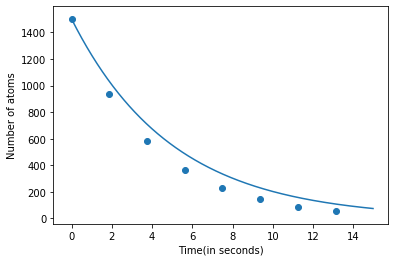

In [100]:
plt.plot(time_space_analytic, number_of_atoms_list_analytic)
plt.scatter(time_space, number_of_atoms_list)
plt.xlabel("Time(in seconds)")
plt.ylabel("Number of atoms")
plt.show()

In [101]:
print("Analytic solution at t = 9: ", round(analytic_solution(9)))

Analytic solution at t = 9:  248.0


In [102]:
print("Euler_Integral solution at t = 9: ", round(number_of_atoms_list[-2]))

Euler_Integral solution at t = 9:  89


In [103]:
print("Error soltuion at time t= 9: ", round(analytic_solution(9)) - round(number_of_atoms_list[3]))

Error soltuion at time t= 9:  -118.0


$Q=\begin{pmatrix} a \\ b \\c \\ d\\ e\end{pmatrix}$

$Q[0] = a, Q[-1]= e$

In [104]:
print(round(number_of_atoms_list[0]))
print(round(number_of_atoms_list[1]))
print(round(number_of_atoms_list[2]))
print(round(number_of_atoms_list[3]))
print(round(number_of_atoms_list[4]))

1500
938
586
366
229


In [105]:
#h = (b-a)/steps
(15-0)/5

3.0

In [106]:
((15-0)/5)**2

9.0

In [107]:
(15-0)/500

0.03

In [108]:
((15-0)/500)**2

0.0009

# Solving ODE with scipy Integrate _odeint_

Introduce the lambda function:

In [109]:
m = lambda a, b: a*b # multyiplies two numbers

In [110]:
print(m(6,9))

54


# Simple Harmonic Oscillator

When there is no dampiong, 

## $m\ddot x =\vec F= - kx(t)$

Let us solve the damped harmonic oscillator with equation

## $m\ddot x = -\gamma\dot x- kx(t)$
## $m\dot v = -\gamma\dot x- kx(t)$
## $\dot x = -\frac{\gamma}{m}\dot x- \frac{k}{m}x(t)$

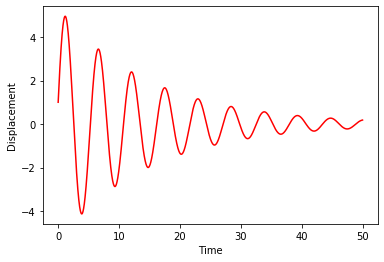

In [117]:
from scipy import *
from scipy.integrate import odeint

def ydot(y,t,m,gamma,k):
    x, v = y[0],y[1]
    return np.array([v,-(gamma/m)*v-k*x/m])

m, gamma, k = 1.5, 0.2, 2.0 #parameters
y0 = np.array([1.0,6.0])

t = np.linspace(0.0, 50.0, 5000)

y = odeint(ydot,y0,t, args=(m, gamma, k))

plt.plot(t,y[:,0],'r-')
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

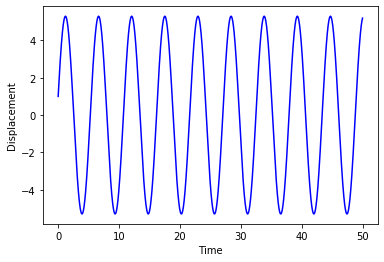

In [118]:
m, gamma, k = 1.5, 0.0, 2.0 #parameters
y0 = np.array([1.0,6.0])

t = np.linspace(0.0, 50.0, 5000)

y_zero = odeint(ydot,y0,t, args=(m, gamma, k))

plt.plot(t,y_zero[:,0],'b-')
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

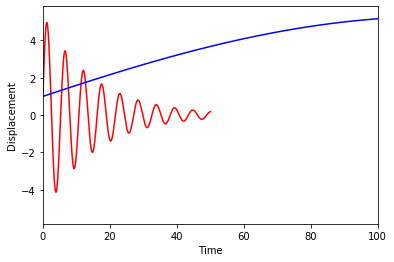

In [120]:
plt.plot(t,y[:,0],'r-',y_zero[:,0],'b-')
plt.xlim(0, 100)
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

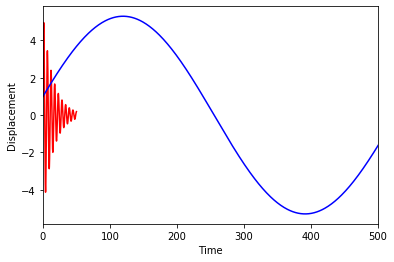

In [125]:
plt.plot(t,y[:,0],'r-',y_zero[:,0],'b-')
plt.xlim(0, 500)
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()